## Se obtienen features de las imágenes

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
from sklearn.feature_extraction import image
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from skimage import feature, exposure, io
import mahotas

from PIL import Image
import cv2 as cv

import os
import pickle as pc

import numpy as np
import pandas as pd

In [10]:
estilos = ['abstract-art', 'realism']

In [11]:
def uno_estilo(estilos):
    imagenes = []
    for e in estilos:
        path = 'imagenes_color/train/{}/'.format(e)
        imagen = cv.imread([os.path.join(path, p) for p in sorted(os.listdir(path))][1])
        imagenes.append(imagen)
        
    return imagenes

In [54]:
path_data = 'data/'
path_train = 'imagenes_color/train/'
path_test = 'imagenes_color/test/'
path_validar = 'imagenes_color/validar/'
path_features = 'features/'
path_training = 'training/'

#### Local features

In [13]:
def sift_ft(imagen):
    sift = cv.xfeatures2d.SIFT_create()
    keypoints_sift, descriptors = sift.detectAndCompute(imagen, None)
    return descriptors

In [14]:
def surf_ft(imagen):
    surf = cv.xfeatures2d.SURF_create()
    keypoints_surf, descriptors = surf.detectAndCompute(imagen, None)
    return descriptors

In [15]:
def orb_ft(imagen):
    orb = cv.ORB_create(nfeatures = 256)
    keypoints_orb, descriptors = orb.detectAndCompute(imagen, None)
    return descriptors

#### Global features

In [38]:
def hu_moments(imagen):
    imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
    feature = cv.HuMoments(cv.moments(imagen)).flatten()
    return feature

In [39]:
def textura(imagen):
    gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gris).mean(axis=0)
    return haralick

In [40]:
def histograma(imagen, mask = None):
    hist = cv.calcHist([imagen],[0], None, [256], [0,256])
    cv.normalize(hist, hist)
    return hist.flatten()

In [41]:
def histograma_color(imagen, mask = None):
    imagen = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)
    hist  = cv.calcHist([imagen], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv.normalize(hist, hist)
    return hist.flatten()

In [42]:
def hog_ft(imagen):
    img_hog = feature.hog(imagen, orientations = 9, 
                          pixels_per_cell = (8, 8),
                          cells_per_block = (1, 1))
 
    return img_hog

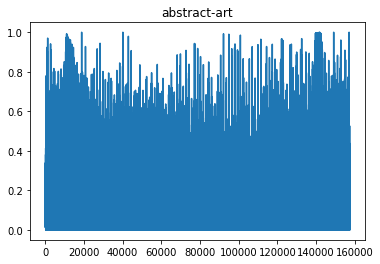

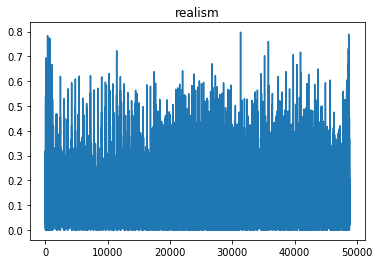

<Figure size 432x288 with 0 Axes>

In [43]:
for i in range(len(una_de_cada)):
    probando_hist = hog_ft(una_de_cada[i])
    plt.plot(probando_hist)
    plt.title(estilos[i])
    plt.figure()

In [44]:
tamano = (256, 256)

In [45]:
def dibuja_matriz(matrix, title, columnas, formato = 0):
    '''
    Para dibujar la matriz de confusión
    matrix : matrix de confusión
    title: título para el gráfico
    columnas: nombre para las columnas (lista)
    formato: el formato para mostrar los datos
        1 : .2f
        2 : .2%
        3 : d
    '''
    if formato == 1:
        fmt = '.2f'
    elif formato == 2:
        fmt = '.2%'
    elif format == 3:
        fmt = 'd'
    else:
        fmt = ''
    
    
    df = pd.DataFrame(matrix, 
                         index = [i for i in columnas],
                         columns = [i for i in columnas])

    plt.figure(figsize = (10,8))
    sns.heatmap(df ,linewidths = .1, cmap = 'YlGnBu', fmt = fmt, annot = True)
    plt.title(title)
    plt.yticks(rotation = 0);

In [50]:
def guardar_archivo(contenido, path_archivo):
    archivo = ''
    with (open(path_archivo, 'wb')) as pc_file:
        try:
            pc.dump(contenido, pc_file)
        except EOFError as e:
            print(e)
            
    return True

In [51]:
def obtener_archivo(path_archivo):
    archivo = ''
    with (open(path_archivo, 'rb')) as pc_file:
        try:
            archivo = pc.load(pc_file)
        except EOFError as e:
            print(e)
            
    return archivo

In [67]:
def features_imagenes(path, arc_features, arc_label):
    '''
    almacena todas las features en un archivo pickle
    path: ruta de las imágenes
    archivo: nombre para el pickle
    '''
    label = []
    feature = []
    for e in estilos:
        archivos = [os.path.join(path+e, p) for p in sorted(os.listdir(path+e))]
 
        print(e)
        for a in archivos:

            imagen = a.split('/')[-1].lower()
            img_arch = cv.imread(a)
            img_arch = cv.resize(img_arch, tamano)

            #Probando con estas feature    
            hu = hu_moments(img_arch)
            haralick_im   = textura(img_arch)
            histograma_im  = histograma_color(img_arch)

            features_imagen = np.hstack([histograma_im, haralick_im, hu])            
            
            label.append(e)
            feature.append(features_imagen)

    guardar_archivo(feature, path_features + arc_features)
    guardar_archivo(label, path_features + arc_label)       



In [68]:
features_imagenes(path_train, 'features-train.pck', 'label-train.pck')
features_imagenes(path_test, 'features-test.pck', 'label-test.pck')

abstract-art
realism
abstract-art
realism
